<a href="https://colab.research.google.com/github/wilheimcosta/ITCZ-Localizer/blob/main/Loczcit_IQR_Previsao_ECMWF_IFS_MOD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [4]:
#!git clone https://github.com/ElivaldoRocha/loczcit-iqr.git
!git clone https://github.com/wilheimcosta/ITCZ-Localizer.git

fatal: destination path 'ITCZ-Localizer' already exists and is not an empty directory.


In [5]:
# 1. Navegar para o diretório
%cd /content/loczcit-iqr

# 2. Instalar TODAS as dependências necessárias de uma vez
print("⚙️ Instalando dependências (isso pode levar um momento)...")
!pip install "pandas==2.2.2" "numpy>=1.26.0,<2.1.0" "requests==2.32.4" -q
!pip install cartopy regionmask cdsapi cftime matplotlib-scalebar netcdf4 pyarrow -q

# 3. Instalar a biblioteca local
print("⚙️ Instalando loczcit-iqr...")
!pip install -e . --no-deps -q

# 4. Instalar dependências de dados
print("⚙️ Instalando dependências de dados...")
!pip install ecmwf-opendata cfgrib xarray -q


print("✅ Dependências instaladas com sucesso!")

[Errno 2] No such file or directory: '/content/loczcit-iqr'
/content
⚙️ Instalando dependências (isso pode levar um momento)...
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 91.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.3/72.3 kB 6.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 57.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 93.7 MB/s eta 0:00:00
⚙️ Instalando loczcit-iqr...
ERROR: file:///content does not appear to be a Python project: neither 'setup.py' nor 'pyproject.toml' found.
⚙️ Instalando dependências de dados...
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.1/56.1 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.4/91.4 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 58.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.1/7.1 MB 49.1 MB/s eta

In [12]:
"""
🔮 Prever a posição da ZCIT para os próximos 5 dias!
"""
import sys
import os
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

# Definir caminhos
# Correcting repo_path to point to the cloned ITCZ-Localizer
repo_path = '/content/ITCZ-Localizer'
if repo_path not in sys.path: sys.path.append(repo_path)

# Adding src directory within ITCZ-Localizer to sys.path
src_path = os.path.join(repo_path, 'src')
if os.path.exists(src_path) and src_path not in sys.path: sys.path.append(src_path)

try:
    from loczcit_iqr.core.data_loader_ecmwf_forecast import ECMWFForecastLoader
    from loczcit_iqr.core.processor import DataProcessor
    from loczcit_iqr.core.iqr_detector import IQRDetector
    from loczcit_iqr.core.spline_interpolator import (
        SplineInterpolator,
        SplineParameters,
        InterpolationMethod
    )
    from loczcit_iqr.plotting.visualizer import ZCITVisualizer
    print("✅ Módulos carregados com sucesso!")
except Exception as e:
    print(f"❌ Erro ao carregar módulos: {e}")

✅ Módulos carregados com sucesso!


In [16]:
# Instalar o cartopy que está faltando
!pip install cartopy -q

# ===================================================================
# EXECUTAR ESTE BLOCO DEPOIS
# ===================================================================

import sys
import os # Adicionado para manipulação de caminhos

# Temporariamente adiciona o diretório 'src' do repositório ITCZ-Localizer ao sys.path
# Isso serve como uma correção para a falha de instalação em células anteriores.
# O módulo `loczcit_iqr` é esperado dentro de `/content/ITCZ-Localizer/src`.
repo_root = '/content/ITCZ-Localizer'
src_dir = os.path.join(repo_root, 'src')
if src_dir not in sys.path:
    sys.path.append(src_dir)
    print(f"Temporariamente adicionado '{src_dir}' ao sys.path.")

# Importar módulos
from datetime import datetime, timedelta
from loczcit_iqr.core.data_loader_ecmwf_forecast import ECMWFForecastLoader

# Testar
print("🧪 Testando módulo de previsão...")
loader = ECMWFForecastLoader()
print(f"✅ Loader criado: {loader}")

# Verificar última rodada disponível
run_time, run_hour = loader.get_latest_forecast_time()
print(f"✅ Última rodada: {run_time.strftime('%Y-%m-%d %H:%M')} UTC ({run_hour:02d}z)")

🧪 Testando módulo de previsão...
2026-02-22 00:57:21,712 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - ECMWFForecastLoader inicializado (source: aws)


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:ECMWFForecastLoader inicializado (source: aws)


✅ Loader criado: ECMWFForecastLoader(
  source=aws,
  cache_dir=ecmwf_forecast_cache,
  cached_files=1
)
✅ Última rodada: 2026-02-21 18:00 UTC (18z)


In [22]:
# =============================================================================
# 1. CARREGAR PREVISÃO (BUSCA AUTOMÁTICA DA ÚLTIMA RODADA)
# =============================================================================
print("📡 Buscando rodada mais recente do ECMWF IFS...")
loader = ECMWFForecastLoader()

# 1. Obter automaticamente a última rodada disponível no servidor
run_time, run_hour = loader.get_latest_forecast_time()
print(f"   ⏳ Detectada última rodada: {run_time.strftime('%d/%m/%Y %H:%M')} UTC ({run_hour:02d}z)")

try:
    # 2. Carregar previsão
    forecast = loader.load_forecast(
        forecast_days=5,
        run_time=run_time
    )
except Exception as e:
    print(f"   ⚠️ Erro ao carregar a rodada {run_hour}z. Tentando rodada anterior...")
    # Tenta 6 horas antes se houver falha no servidor de arquivos
    run_time = run_time - timedelta(hours=6)
    forecast = loader.load_forecast(
        forecast_days=5,
        run_time=run_time
    )

# Extrair metadados para exibição
forecast_run = forecast.attrs.get('forecast_run', 'N/A')
forecast_days = forecast.attrs.get('forecast_days', 5)

if isinstance(forecast_run, str) and forecast_run != 'N/A':
    run_datetime = datetime.fromisoformat(forecast_run)
    run_str = run_datetime.strftime('%d/%m/%Y %H')
    valid_start = run_datetime + timedelta(days=1)
    valid_end = run_datetime + timedelta(days=forecast_days)
    period_str = f"{valid_start.strftime('%d/%m')} - {valid_end.strftime('%d/%m/%Y')}"
else:
    run_str = "N/A"
    period_str = "N/A"

print(f"   ✅ Rodada carregada: {run_str}Z")
print(f"   ✅ Período válido: {period_str}")

📡 Buscando rodada mais recente do ECMWF IFS...
2026-02-22 01:02:55,567 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - ECMWFForecastLoader inicializado (source: aws)


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:ECMWFForecastLoader inicializado (source: aws)


   ⏳ Detectada última rodada: 21/02/2026 18:00 UTC (18z)
2026-02-22 01:02:55,570 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - Carregando previsão de OLR para 5 dias


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:Carregando previsão de OLR para 5 dias


2026-02-22 01:02:55,571 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - Calculando OLR dia 1: steps 0h -> 24h


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:Calculando OLR dia 1: steps 0h -> 24h


2026-02-22 01:02:55,631 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO -   Dia 1: OLR médio = 267.21 W/m²


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:  Dia 1: OLR médio = 267.21 W/m²


2026-02-22 01:02:55,633 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - Calculando OLR dia 2: steps 24h -> 48h


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:Calculando OLR dia 2: steps 24h -> 48h


2026-02-22 01:02:55,746 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO -   Dia 2: OLR médio = 268.24 W/m²


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:  Dia 2: OLR médio = 268.24 W/m²


2026-02-22 01:02:55,749 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - Calculando OLR dia 3: steps 48h -> 72h


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:Calculando OLR dia 3: steps 48h -> 72h


2026-02-22 01:02:55,861 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO -   Dia 3: OLR médio = 268.21 W/m²


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:  Dia 3: OLR médio = 268.21 W/m²


2026-02-22 01:02:55,863 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - Calculando OLR dia 4: steps 72h -> 96h


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:Calculando OLR dia 4: steps 72h -> 96h


2026-02-22 01:02:55,974 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO -   Dia 4: OLR médio = 269.33 W/m²


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:  Dia 4: OLR médio = 269.33 W/m²


2026-02-22 01:02:55,975 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - Calculando OLR dia 5: steps 96h -> 120h


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:Calculando OLR dia 5: steps 96h -> 120h


2026-02-22 01:02:56,087 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO -   Dia 5: OLR médio = 266.23 W/m²


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:  Dia 5: OLR médio = 266.23 W/m²


2026-02-22 01:02:56,097 - loczcit_iqr.core.data_loader_ecmwf_forecast - INFO - Previsão carregada: 5 dias, OLR médio = 267.84 W/m²


INFO:loczcit_iqr.core.data_loader_ecmwf_forecast:Previsão carregada: 5 dias, OLR médio = 267.84 W/m²


   ✅ Rodada carregada: 21/02/2026 18Z
   ✅ Período válido: 22/02 - 26/02/2026


In [24]:
print(forecast)

<xarray.Dataset> Size: 161kB
Dimensions:  (lat: 117, lon: 337)
Coordinates:
  * lat      (lat) float64 936B 17.0 16.75 16.5 16.25 ... -11.5 -11.75 -12.0
  * lon      (lon) float64 3kB -80.0 -79.75 -79.5 -79.25 ... 3.25 3.5 3.75 4.0
Data variables:
    olr      (lat, lon) float32 158kB 289.0 289.1 289.0 ... 285.7 285.9 285.3
Attributes:
    title:               ECMWF IFS OLR Forecast (mean) - NOAA-compatible
    institution:         European Centre for Medium-Range Weather Forecasts (...
    source:              ECMWF IFS Operational Forecast
    forecast_run:        2026-02-21T18:00:00
    forecast_days:       5
    aggregation_method:  mean
    history:             Created on 2026-02-22 01:02:56
    conventions:         CF-1.7
    spatial_resolution:  0.25 degrees
    converted_for:       loczcit_iqr library compatibility


In [25]:
# =============================================================================
# 2. PROCESSAR DADOS
# =============================================================================
print("\n🔍 Processando dados...")

# Identificar mínimos de OLR
processor = DataProcessor()
min_coords = processor.find_minimum_coordinates(
    forecast.olr,
    method='column_minimum'
)
print(f"   ✅ Mínimos encontrados: {len(min_coords)}")

# Detectar outliers
detector = IQRDetector(constant=1.5)
coords_valid, coords_outliers, stats = detector.detect_outliers(min_coords)
print(f"   ✅ Coordenadas válidas: {len(coords_valid)}")
print(f"   ✅ Outliers removidos: {len(coords_outliers)}")

# Interpolar linha da ZCIT
interpolator = SplineInterpolator()
params = SplineParameters(
    method=InterpolationMethod.BSPLINE,
    smooth_factor='high'
)
zcit_line, interp_stats = interpolator.interpolate(coords_valid, parameters=params)


🔍 Processando dados...
2026-02-22 01:03:05,545 - loczcit_iqr.core.processor - INFO - Arquivo padrão da área de estudo encontrado: /content/ITCZ-Localizer/src/data/shapefiles/Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Arquivo padrão da área de estudo encontrado: /content/ITCZ-Localizer/src/data/shapefiles/Area_LOCZCIT.parquet


2026-02-22 01:03:05,547 - loczcit_iqr.core.processor - INFO - Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


INFO:loczcit_iqr.core.processor:Buscando mínimos de OLR (método: column_minimum, threshold: None, raio: 1px)


2026-02-22 01:03:05,550 - loczcit_iqr.core.processor - INFO - Carregando área de estudo de: /content/ITCZ-Localizer/src/data/shapefiles/Area_LOCZCIT.parquet


INFO:loczcit_iqr.core.processor:Carregando área de estudo de: /content/ITCZ-Localizer/src/data/shapefiles/Area_LOCZCIT.parquet


2026-02-22 01:03:05,624 - loczcit_iqr.core.processor - INFO - Encontradas 34 coordenadas de mínimo


INFO:loczcit_iqr.core.processor:Encontradas 34 coordenadas de mínimo


   ✅ Mínimos encontrados: 34
2026-02-22 01:03:05,627 - loczcit_iqr.core.iqr_detector - INFO - IQRDetector inicializado com constante: 1.5
2026-02-22 01:03:05,628 - loczcit_iqr.core.iqr_detector - INFO - Detectando outliers em 34 coordenadas (analisando latitude)
2026-02-22 01:03:05,631 - loczcit_iqr.core.iqr_detector - INFO - Detecção concluída: 33 válidas, 1 outliers
   ✅ Coordenadas válidas: 33
   ✅ Outliers removidos: 1
2026-02-22 01:03:05,633 - loczcit_iqr.core.spline_interpolator - INFO - SplineInterpolator inicializado: método='bspline', lat_ref=0.00°
2026-02-22 01:03:05,634 - loczcit_iqr.core.spline_interpolator - INFO - Interpolando 33 coordenadas: método=bspline, pontos_saída=100


In [26]:
# =============================================================================
# 3. CALCULAR ESTATÍSTICAS DA ZCIT
# =============================================================================
# Latitude média da ZCIT prevista

# Extrair coordenadas do LineString
if hasattr(zcit_line, 'coords'):
    # É um objeto Shapely LineString
    coords_list = list(zcit_line.coords)
    lats_zcit = [coord[1] for coord in coords_list]
else:
    # É uma lista de tuplas
    lats_zcit = [coord[1] for coord in zcit_line]

lat_media = sum(lats_zcit) / len(lats_zcit)
lat_min = min(lats_zcit)
lat_max = max(lats_zcit)

# OLR médio
olr_medio = float(forecast.olr.mean())

print(f"\n📊 Estatísticas da ZCIT Prevista:")
print(f"   📍 Latitude média: {lat_media:.2f}°")
print(f"   📍 Variação: {lat_min:.2f}° a {lat_max:.2f}°")
print(f"   🌡️  OLR médio: {olr_medio:.1f} W/m²")


📊 Estatísticas da ZCIT Prevista:
   📍 Latitude média: -2.10°
   📍 Variação: -2.81° a 0.33°
   🌡️  OLR médio: 267.8 W/m²



🗺️  Gerando visualização...

Iniciando a criação da visualização completa...
✅ Visualização completa pronta.

💾 Figura salva: previsao_zcit_20260221_18Z.png


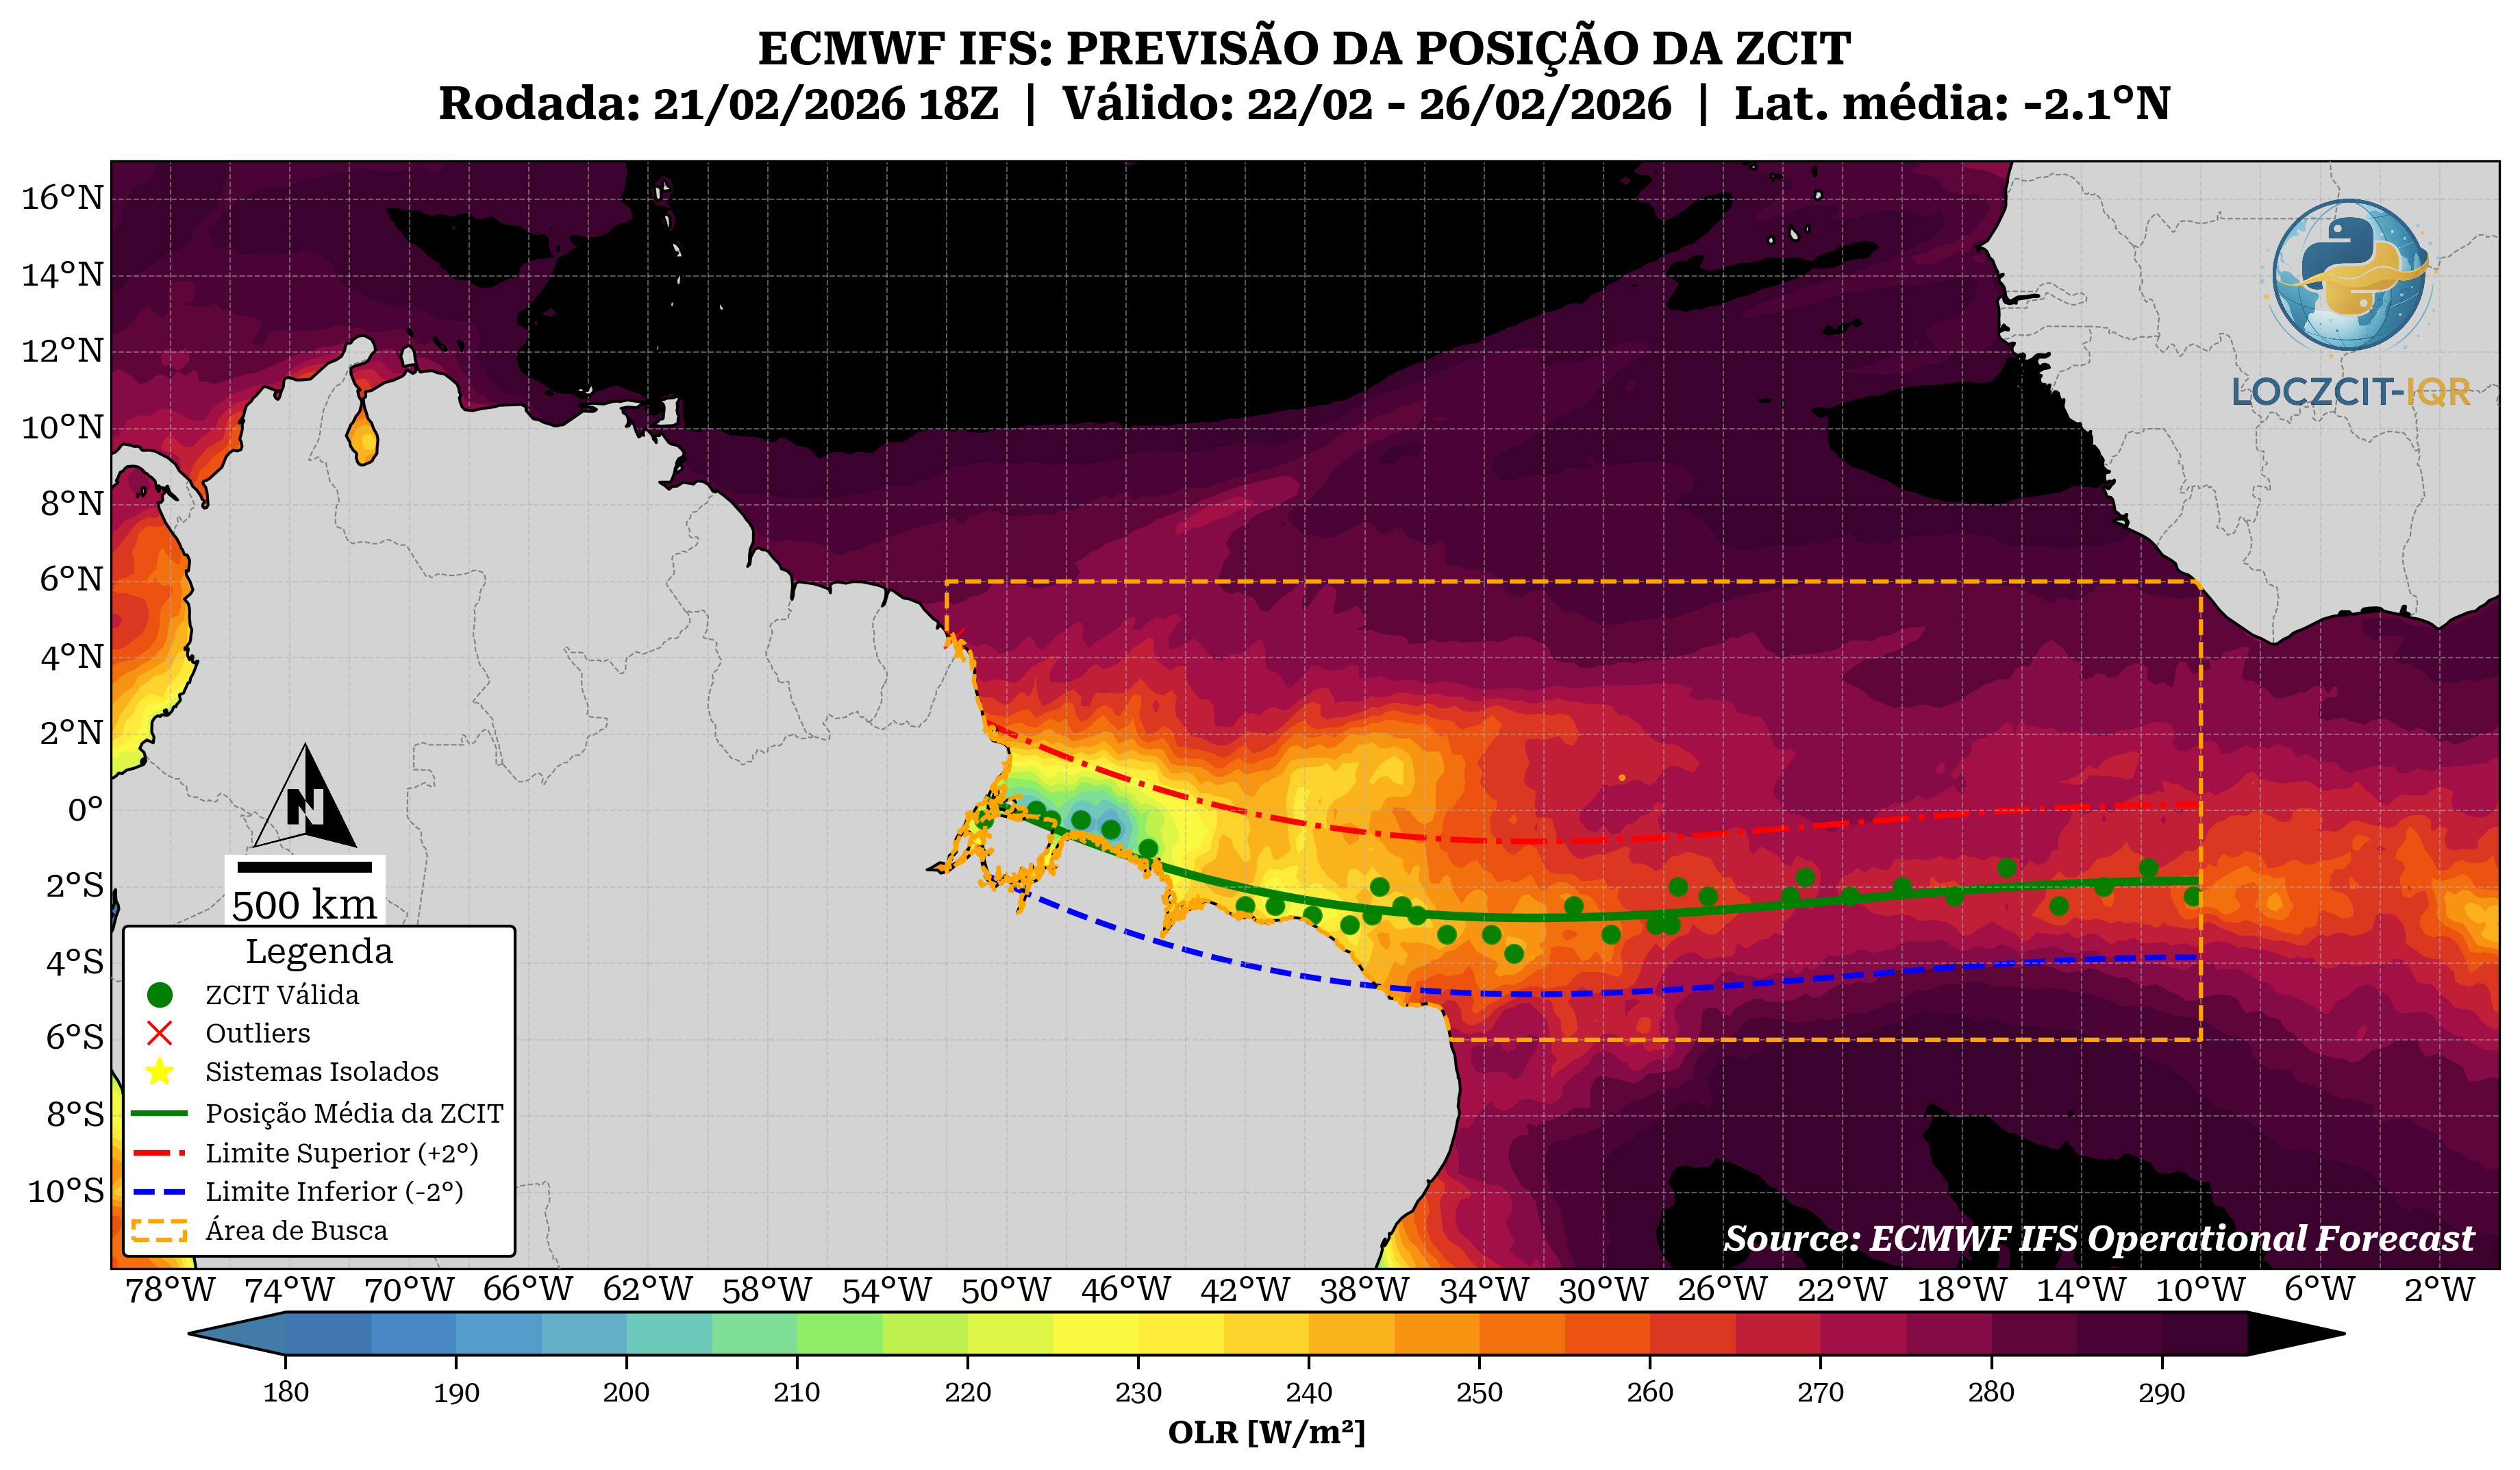


📋 RESUMO DA PREVISÃO
   🕐 Rodada ECMWF:      21/02/2026 18Z
   📅 Período válido:    22/02 - 26/02/2026
   📍 Lat. média ZCIT:  -2.10°N
   📏 Amplitude Lat.:    3.14°
   🌡️  OLR médio:         267.8 W/m²
   ✅ Pontos válidos:    33
   ❌ Outliers:          1


In [27]:
# =============================================================================
# 4. VISUALIZAÇÃO COM TÍTULO INFORMATIVO
# =============================================================================
print("\n🗺️  Gerando visualização...")

# -----------------------------------------------------------------------------
# TÍTULO INFORMATIVO CUSTOMIZADO
# -----------------------------------------------------------------------------
titulo_principal = f"ECMWF IFS: PREVISÃO DA POSIÇÃO DA ZCIT\nRodada: {run_str}Z  |  Válido: {period_str}  |  Lat. média: {lat_media:.1f}°N"

viz = ZCITVisualizer(template='publication')

# Gerar o gráfico base
fig, ax = viz.plot_complete_analysis(
    olr_data=forecast,
    title=titulo_principal,
    coords_valid=coords_valid,
    coords_outliers=coords_outliers,
    zcit_line=zcit_line,
    study_area_visible=True,
    credits="ECMWF"
)


# -----------------------------------------------------------------------------
# ANOTAÇÃO COM RESUMO (Correção do KeyError aqui)
# -----------------------------------------------------------------------------
resumo_texto = (
    f"IQR: {stats['lower_limit']:.1f}° – {stats['upper_limit']:.1f}°\n"
    f"Pontos: {len(coords_valid)} válidos, {len(coords_outliers)} outliers\n"
    f"OLR médio: {olr_medio:.0f} W/m²"
)

# =============================================================================
# 5. SALVAR E MOSTRAR
# =============================================================================
# Nome do arquivo dinâmico baseado na rodada
if isinstance(forecast_run, str) and forecast_run != 'N/A':
    filename = f"previsao_zcit_{run_datetime.strftime('%Y%m%d_%H')}Z.png"
else:
    filename = f"previsao_zcit_{datetime.now().strftime('%Y%m%d_%H%M')}.png"

# Salvar em alta resolução
plt.savefig(filename, dpi=200, bbox_inches='tight', facecolor='white')
print(f"\n💾 Figura salva: {filename}")

# Exibir gráfico
plt.show()

# =============================================================================
# 6. RESUMO FINAL NO CONSOLE
# =============================================================================
print("\n" + "=" * 60)
print("📋 RESUMO DA PREVISÃO")
print("=" * 60)
print(f"   🕐 Rodada ECMWF:      {run_str}Z")
print(f"   📅 Período válido:    {period_str}")
print(f"   📍 Lat. média ZCIT:  {lat_media:.2f}°N")
print(f"   📏 Amplitude Lat.:    {lat_max - lat_min:.2f}°")
print(f"   🌡️  OLR médio:         {olr_medio:.1f} W/m²")
print(f"   ✅ Pontos válidos:    {len(coords_valid)}")
print(f"   ❌ Outliers:          {len(coords_outliers)}")
print("=" * 60)